In [87]:
# make necessary imports
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
dataset = pd.read_csv('/content/kidney_disease.csv')
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [89]:
# Find null values in our dataset
dataset.isnull().sum()/len(dataset)*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [90]:
dataset.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [91]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.082474,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.474713
std,115.614301,17.169714,14.736739,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,3.040816
min,0.000000,2.000000,0.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [92]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [93]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')
imputer3 = SimpleImputer(strategy='most_frequent')
#imputer4 = SimpleImputer(strategy='constant')

In [94]:
trf = ColumnTransformer([('imputer1', imputer1,['age','bp','sg','al','su','sod','pot', 'hemo']),
                         ('imputer2', imputer2, ['bgr','bu','sc']),
                         ('imputer3', imputer3,['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']),
                         ],
                          remainder='passthrough')

In [95]:
dataset1 = dataset.copy()
dataset1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [96]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(),
                                 ['age', 'bp', 'sg', 'al', 'su', 'sod', 'pot',
                                  'hemo']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['bgr', 'bu', 'sc']),
                                ('imputer3',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc',
                                  'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])])

In [97]:
dataset1 = dataset1.drop(['id'], axis=1)

In [98]:
df_imputed = pd.DataFrame(trf.fit_transform(dataset1))
df_imputed.head()
#df_imputed.columns = dataset1.columns

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48.0,80.0,1.02,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,111.0,2.5,11.2,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.0,1.01,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [99]:
df_imputed.columns = ['age','bp','sg','al','su','sod','pot', 'hemo','bgr','bu','sc','rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane','classification']

In [100]:
df_imputed.head()

,age,bp,sg,al,su,sod,pot,hemo,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,111.0,2.5,11.2,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.0,1.01,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [101]:
df_imputed.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
sod,0
pot,0
hemo,0
bgr,0
bu,0


In [102]:
#finding the unique values
for i in df_imputed.columns:
  print(f'""""""{i}**************')
  print()
  print(set(df_imputed[i].to_list()))
  print()

""""""age**************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 51.48337595907928, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 57.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, 66.0}

""""""bp**************

{0.0, 100.0, 70.0, 76.08247422680412, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

""""""sg**************

{1.0174079320113314, 1.02, 1.005, 1.015, 1.01, 1.025}

""""""al**************

{0.0, 1.0, 2.0, 3.0, 4.0, 1.0169491525423728, 5.0}

""""""su**************

{0.0, 1.0, 0.45014245014245013, 3.0, 4.0, 2.0, 5.0}

""""""sod**************

{128.0, 129.0, 130.0, 131.0, 4.5, 132.0, 133.0, 135.0, 136.0, 137.52875399361022, 138.0, 139.0, 140.0, 141.0, 142.0, 134.0, 137.0, 14

In [103]:
'''
bp
hemo
pcv
wc
rc
dm
cad
classification
'''

'\nbp\nhemo\npcv\nwc\nrc\ndm\ncad\nclassification\n'

In [104]:
df_imputed['bp'] = np.where(df_imputed['bp'] == 0.0 , df_imputed['bp'].median() , df_imputed['bp'])
df_imputed['hemo'] = np.where(df_imputed['hemo'] == 0.0 , df_imputed['hemo'].median() , df_imputed['hemo'])
df_imputed['pcv'] = np.where(df_imputed['pcv'] ==  '\t43', 43 , np.where(df_imputed['hemo'] == '\t?' , df_imputed['hemo'].mode()[0] , df_imputed['hemo']))
df_imputed['pcv'] = df_imputed['pcv'].astype(int)
df_imputed['wc'] = np.where(df_imputed['wc'] ==  '\t6200', 6200 , np.where(df_imputed['wc'] == '\t?' , df_imputed['wc'].mode()[0] , np.where(df_imputed['wc'] == '\t8400' , 8400 , df_imputed['wc'])))
df_imputed['wc'] = df_imputed['wc'].astype(int)
df_imputed['rc'] = np.where(df_imputed['rc'] == '\t?' , df_imputed['rc'].mode()[0] , df_imputed['rc'])
df_imputed['rc'] = df_imputed['rc'].astype(float)
df_imputed['dm'] = np.where(df_imputed['dm'] ==  '\tyes', 'yes' , np.where(df_imputed['dm'] == '\tno' , 'no' , df_imputed['dm']))
df_imputed['cad'] = np.where(df_imputed['cad'] == '\tno' , 'no' , df_imputed['cad'])
df_imputed['classification'] = np.where(df_imputed['classification'] ==  'ckd\t' , 'ckd' , df_imputed['classification'])

In [105]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    object 
 1   bp              400 non-null    object 
 2   sg              400 non-null    object 
 3   al              400 non-null    object 
 4   su              400 non-null    object 
 5   sod             400 non-null    object 
 6   pot             400 non-null    object 
 7   hemo            400 non-null    object 
 8   bgr             400 non-null    object 
 9   bu              400 non-null    object 
 10  sc              400 non-null    object 
 11  rbc             400 non-null    object 
 12  pc              400 non-null    object 
 13  pcc             400 non-null    object 
 14  ba              400 non-null    object 
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [107]:
a = ['age' , 'bp' , 'sg' , 'al' , 'su' , 'sod' , 'pot' , 'hemo' , 'bgr' , 'bu' , 'sc' , 'rc']
b = ['pcv' , 'wc']
for i in a:
  df_imputed[i] = df_imputed[i].astype(float)
for i in b:
  df_imputed[i] = df_imputed[i].astype(int)

In [108]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   sod             400 non-null    float64
 6   pot             400 non-null    float64
 7   hemo            400 non-null    float64
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  rbc             400 non-null    object 
 12  pc              400 non-null    object 
 13  pcc             400 non-null    object 
 14  ba              400 non-null    object 
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [109]:
df_imputed['rbc'] = df_imputed['rbc'].astype('category')
df_imputed['rbc'] = df_imputed['rbc'].cat.codes

In [110]:
df_imputed['pc'] = df_imputed['pc'].astype('category')
df_imputed['pc'] = df_imputed['pc'].cat.codes

df_imputed['pcc'] = df_imputed['pcc'].astype('category')
df_imputed['pcc'] = df_imputed['pcc'].cat.codes

df_imputed['ba'] = df_imputed['ba'].astype('category')
df_imputed['ba'] = df_imputed['ba'].cat.codes

df_imputed['htn'] = df_imputed['htn'].astype('category')
df_imputed['htn'] = df_imputed['htn'].cat.codes

df_imputed['dm'] = df_imputed['dm'].astype('category')
df_imputed['dm'] = df_imputed['dm'].cat.codes

df_imputed['cad'] = df_imputed['cad'].astype('category')
df_imputed['cad'] = df_imputed['cad'].cat.codes

df_imputed['appet'] = df_imputed['appet'].astype('category')
df_imputed['appet'] = df_imputed['appet'].cat.codes

df_imputed['pe'] = df_imputed['pe'].astype('category')
df_imputed['pe'] = df_imputed['pe'].cat.codes

df_imputed['ane'] = df_imputed['ane'].astype('category')
df_imputed['ane'] = df_imputed['ane'].cat.codes

df_imputed['classification'] = df_imputed['classification'].astype('category')
df_imputed['classification'] = df_imputed['classification'].cat.codes

In [111]:
df_imputed.head()

,age,bp,sg,al,su,sod,pot,hemo,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,15,7800,5.2,1,2,0,0,0,0,0
1,7.0,50.000000,1.020,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,11,6000,5.2,0,1,0,0,0,0,0
2,62.0,80.000000,1.010,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,9,7500,5.2,0,2,0,1,0,1,0
3,48.0,70.000000,1.005,4.0,0.0,111.000000,2.500000,11.2,117.0,56.0,...,11,6700,3.9,1,1,0,1,1,1,0
4,51.0,76.082474,1.010,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,11,7300,4.6,0,1,0,0,0,0,0


In [112]:
df_imputed['classification'].value_counts()

,count
classification,
0,250
1,150


In [113]:
# Feature scaling
x = df_imputed.iloc[: , :-1]
y = df_imputed.iloc[:, -1]
x.head()

,age,bp,sg,al,su,sod,pot,hemo,bgr,bu,...,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.000000,1.020,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,0,15,7800,5.2,1,2,0,0,0,0
1,7.0,50.000000,1.020,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,0,11,6000,5.2,0,1,0,0,0,0
2,62.0,80.000000,1.010,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,0,9,7500,5.2,0,2,0,1,0,1
3,48.0,70.000000,1.005,4.0,0.0,111.000000,2.500000,11.2,117.0,56.0,...,0,11,6700,3.9,1,1,0,1,1,1
4,51.0,76.082474,1.010,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,0,11,7300,4.6,0,1,0,0,0,0


In [114]:
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [115]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.045455,-0.538462,0.5,-0.6,-1.0,0.678596,-0.904394,0.673469,-0.576923,-0.822850,...,-1.0,-0.40,-0.537190,0.050847,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,-0.886364,-1.000000,0.5,0.6,-1.0,0.678596,-0.904394,0.115646,-0.576923,-0.915276,...,-1.0,-0.60,-0.685950,0.050847,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
2,0.363636,-0.538462,-0.5,-0.2,0.2,0.678596,-0.904394,-0.115646,0.713675,-0.735558,...,-1.0,-0.70,-0.561983,0.050847,-1.0,1.0,-1.0,1.0,-1.0,1.0
3,0.045455,-0.692308,-1.0,0.6,-1.0,0.343849,-1.000000,0.102041,-0.594017,-0.720154,...,-1.0,-0.60,-0.628099,-0.389831,1.0,0.0,-1.0,1.0,1.0,1.0
4,0.113636,-0.598731,-0.5,-0.2,-1.0,0.678596,-0.904394,0.156463,-0.641026,-0.874198,...,-1.0,-0.60,-0.578512,-0.152542,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.204545,-0.538462,0.5,-1.0,-1.0,0.835962,-0.892135,0.714286,-0.495726,-0.756098,...,-1.0,-0.40,-0.628099,-0.050847,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
396,-0.090909,-0.692308,1.0,-1.0,-1.0,0.722397,-0.955056,0.823129,-0.773504,-0.848524,...,-1.0,-0.35,-0.537190,0.389831,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
397,-0.772727,-0.538462,0.5,-1.0,-1.0,0.671924,-0.914607,0.727891,-0.666667,-0.874198,...,-1.0,-0.40,-0.636364,0.118644,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
398,-0.659091,-0.846154,1.0,-1.0,-1.0,0.646688,-0.892135,0.510204,-0.606838,-0.750963,...,-1.0,-0.45,-0.586777,0.288136,-1.0,0.0,-1.0,-1.0,-1.0,-1.0


In [116]:
# split data into train test
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.25,random_state = 21 , stratify = y)

In [117]:
from sklearn.svm import SVC

In [118]:
# boosting method

# Ada Boost
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train,y_train)
y_pred_test_ada = ada_boost.predict(x_test)
y_pred_train_ada = ada_boost.predict(x_train)
accur_ada = accuracy_score(y_test , y_pred_test_ada)


In [120]:
# gradient boosting classifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train , y_train)
y_pred_test_grad = grad_boost.predict(x_test)
accur_grad = accuracy_score(y_test , y_pred_test_grad)

In [122]:
#XGBoost classifier
xgb = XGBClassifier()
xgb.fit(x_test , y_test)
y_pred_test_xgb = xgb.predict(x_test)
accur_xgb = accuracy_score(y_test , y_pred_test_xgb)


In [125]:
# SVM -
# kernel = linear
svm_linear = SVC(kernel='linear')
linear = svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# kernel = sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
sigmoid = svm_sigmoid.fit(x_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# kernel = poly
svm_poly = SVC(kernel='poly')
poly = svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# kernel = rbf
svm_rbf = SVC(kernel='rbf')
rbf = svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

Axes(0.125,0.11;0.775x0.77)


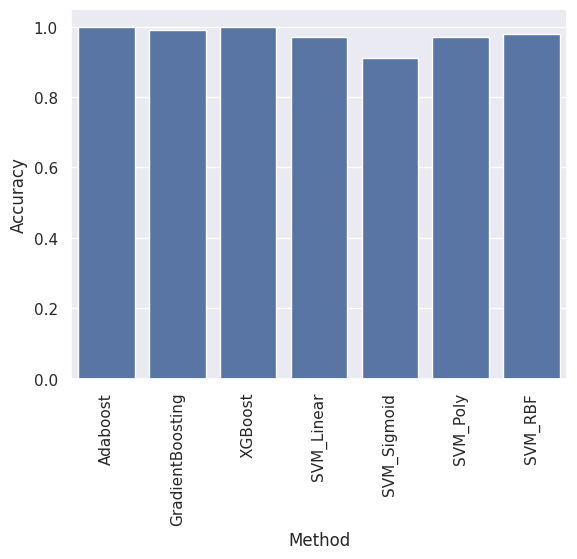

In [127]:
list1 = ['Adaboost','GradientBoosting','XGBoost','SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF']
list2 = [accur_ada,accur_grad,accur_xgb,accuracy_linear,accuracy_sigmoid,accuracy_poly,accuracy_rbf]
#list3 = [adbt,gdbt,xgbt,linear,sigmoid,poly, rbf]
final_accuracy = pd.DataFrame({'Method':list1, "Accuracy":list2})
chart = sns.barplot(x='Method', y='Accuracy', data=final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [128]:
# XGBClassifier
xgboost = XGBClassifier()
xgbt = xgboost.fit(x_train, y_train)
y_pred_xgbt_train = xgboost.predict(x_train)
y_pred_xgbt_test = xgboost.predict(x_test)
accuracy_xgbt_train = accuracy_score(y_train, y_pred_xgbt_train)
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(xgboost, x_train, y_train, cv=10)
accuracy_xgbt_test = accuracy_score(y_test, y_pred_xgbt_test)
print(accuracy_train.mean())
print(accuracy_xgbt_test)

0.9766666666666668
0.99


In [129]:
print(classification_report(y_train, y_pred_xgbt_train))
print()
print(classification_report(y_test, y_pred_xgbt_test))
print("Training Accuracy :",accuracy_train.mean())
print()
print("Test Accuracy :",accuracy_xgbt_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       112

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Training Accuracy : 0.9766666666666668

Test Accuracy : 0.99


In [130]:
print(confusion_matrix(y_train, y_pred_xgbt_train))
print()
print(confusion_matrix(y_test, y_pred_xgbt_test))

[[188   0]
 [  0 112]]

[[62  0]
 [ 1 37]]
